In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Bivariate Analysis - Introduction

Diagnosing and exploring data before perfoming model development is a mandatory task. The most common statistical or visual diagnoses that are used in the industry are univariate and bivariate analysis with the dependent variable. 

In this notebook, a multi-label categorical variable is taken and different visual and statistical analyses that can be done using this variable would be explored.

The data used in this case is used cars dataset and we want to know whether there are any significant differences between used cars of different companies in terms of variuos features available. Audi, Mercedes and Toyota are considered.

## Basic Data Pre-Processing

Before jumping into full-fledged analysis, we need to read the data and do some basic processing.

### Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, kruskal, f_oneway
from sklearn.model_selection import train_test_split

### Reading the used cars dataset

The three companies Audi, Mercedes and Toyota are taken and appended by row-axis.

In [ ]:
audi = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv")
merc = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv")
toyota = pd.read_csv("/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv")
print(audi.columns)
print(merc.columns)
print(toyota.columns)
audi["Company"] = "Audi"
merc["Company"] = "Mercedes"
toyota["Company"] = "Toyota"

In [ ]:
cars = pd.concat([audi,merc,toyota])
cars.head()

In [ ]:
cars.dtypes

In [ ]:
cars.isnull().sum()

In [ ]:
cars.shape

## Visual Bivariate Analysis with Quantitative Variable

As explained in the introduction, we want to explore the differences between different features of a used car between the three companies. In this section, we are only going to see the interactions between multi-label variable **Company** and other **quantitative** variables. In this case, the quantitative variables are 

* price
* mileage
* tax
* mpg
* enginesize

### Box Plot

Box plots displays the five number summary of a set of data - Min, Q1, Median, Q3 and Max. Generally these plots are used to detect outliers.

In this case, we can plot for different categories and see whether there is any significant difference in the distributions. Seaborn **boxplot()** function provides many options to customize thebox plot

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15,8))
for axi,col_name in zip(axs.flat,["price","mileage","tax","mpg","engineSize"]):
    sns.boxplot(x="Company",y=col_name,data=cars,ax=axi)
fig.delaxes(ax = axs[1,2])
fig.tight_layout()
fig.show()

From the above box plots, we can make the following inferences

* There are good amount of outliers in the all the quantitative variables but Toyota have the least outliers
* The median price of used cars from different companies follow the trend Mercedes, Audi and then Toyota
* The Toyota cars' engineSize have a large variability compared to other two companies
* The median miles per gallon of Toyota car is greater than that of Audi cars which is reverse of what we observed in price
* Tax seems to be the same across all the companies

### Strip plot

If we want to look at all the observations in a dataset, strip plot can be drawn. In this case, it is not preferred becasue there are 30000 observations and the graph may look cluttered. **train_test_split()** in sklearn module is used to randomly split the data.

In [ ]:
cars_sample1,cars_sample2 = train_test_split(cars,test_size=0.95,stratify=cars["Company"],random_state=1234)
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15,8),sharex=True)
for axi,col_name in zip(axs.flat,["price","mileage","tax","mpg","engineSize"]):
    sns.stripplot(x="Company",y=col_name,data=cars_sample1,ax=axi)
fig.delaxes(ax = axs[1,2])
fig.tight_layout()
fig.show()

### Swarm Plot

Swarm plot is just like Strip plots but arranged neatly. Again, they don't work when the number of samples are high in number

In [ ]:
cars_sample1,cars_sample2 = train_test_split(cars,test_size=0.995,stratify=cars["Company"],random_state=1234)
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15,8),sharex=True)
for axi,col_name in zip(axs.flat,["price","mileage","tax","mpg","engineSize"]):
    sns.swarmplot(x="Company",y=col_name,data=cars_sample1,ax=axi,size=2)
fig.delaxes(ax = axs[1,2])
fig.tight_layout()
fig.show()

As we can see above, after sampling only 0.5% of the data and reducing point size, we are able to see swarmplots properly. Hence, violon plots became popular recently.

### Violin Plot

When the number of samples is large and we want to know the distribution of numerical variable with respenct to quantitative variable, violin plots are the best.

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15,8),sharex=True)
for axi,col_name in zip(axs.flat,["price","mileage","tax","mpg","engineSize"]):
    sns.violinplot(x="Company",y=col_name,data=cars,ax=axi)
fig.delaxes(ax = axs[1,2])
fig.tight_layout()
fig.show()

From the above plots, we can make even better inferences about some variables compared to that of box plots. For example, we can see that many Audi and Mercedes cars have ~2 engineSize whereas many Toyota cars have ~1 engineSize. Also we got to knwo the approximate median tax from box plots. Using violin plots we can also infer that some cars have very less tax.

### Point Plot

Point plots are used if ther is a need of comparing the aggregated measures of all the three categories. It represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15,8))
for axi,col_name in zip(axs.flat,["price","mileage","tax","mpg","engineSize"]):
    sns.pointplot(x="Company",y=col_name,data=cars,ax=axi)
fig.delaxes(ax = axs[1,2])
fig.tight_layout()
fig.show()

From the above plots, the mean of different variables for the three companies are clearly visible

### Overlapping Histograms

Histograms are approximate representations of numerical distributions and most commonly used univariate analyses for quantitative variables. In this case, we can show three histograms for three companies overlapping. **pairplot()** is used as it gives all the five overlapping histograms with minimal amount of code. (Look at only plots on the diagonal)

In [ ]:
sns.pairplot(data=cars,hue="Company")
plt.show()

Similar inferences as we got from box plots and violin plots are visible here.

* **Tax**, **engineSize** and **mileage** distributions are looking same for all the three companies
* **mpg** and **price** distributions have minute differences

## Visual Bivariate Analysis with Categorical variable

Unlike analysis with quantitative variales, bivariate categorical analysis is limited. Only count plots to measure the count in differernt categories can be drawn. The three plots that can be used are clustered bar plot, stacked bar plot and segmented bar plot. 

### Clustered bar plot

In [ ]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(15,8))
for axi,col_name in zip(axs.flat,["transmission","fuelType"]):
    sns.countplot(data=cars,x="Company",hue=col_name,ax=axi)
plt.show()

We can infer from the above plots that Audi makes all the cars, Mercedes makes Semi-automatic cars and Toyota makes Manual cars the most. Similar trend can be observed with fuelType too.

### Stacked Bar Plot

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
cars.groupby(['Company', 'fuelType'])["model"].count().reset_index().pivot(columns='fuelType', index='Company', values='model').plot(kind="bar",stacked=True,ax=ax1)
cars.groupby(['Company', 'transmission'])["model"].count().reset_index().pivot(columns='transmission', index='Company', values='model').plot(kind="bar",stacked=True,ax=ax2)
fig.show()

## Statistical Bivariate Analysis with Quantitative Variable

There are lot of statistical tests that can be done to prive the relation between multilable variable and another numeric variable. All the possible tests are explored in this article.

Before testing for the interactions, we need to check the normality of the data to decide between parametric and non-parametric tests. We can do this visually or statistically

### Normality check - Visualization

Histograms and QQ plots are the most popular ways to check the normality of numeric variables.

In [ ]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize=(15,8))
for axi,col_name in zip(axs.flat,["price","mileage","tax","mpg","engineSize"]):
    sns.distplot(cars[col_name], kde=True, hist=True,ax=axi)
fig.delaxes(ax = axs[1,2])
fig.tight_layout()
fig.show()

In [ ]:
from statsmodels.graphics.gofplots import qqplot
for axi,col_name in zip(axs.flat,["price","mileage","tax","mpg","engineSize"]):
    qqplot(cars[col_name], line='s')

From the histograms and QQ plots we can see that mpg is the only variable that seems to have normal distribution. All the other variables are skewed right or left.

### Normality Check - Statistical

There are multiple statistical tests to check the normalty. In this exercise, Shapiro-Wilk test and D’Agostino and Pearson’s test is used.

**Shapiro-Wilk Test**

Null hypothesis is that a sample is drawn from a normal distribution.

In [ ]:
from scipy.stats import shapiro

for col_name in ["price","mileage","tax","mpg","engineSize"]:
    print(f"Test results of {col_name} variable is")
    stat, p = shapiro(cars[col_name])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

If the p-value is less than 0.05, we can reject the null hypothesis the data is normal. Since all variables have p-value <0.05, not even one variable have normal distribution. So, we can only conduct non-parametric tests

**D’Agostino and Pearson’s Test**

The null hypothesis is same as Shapiro-Wilk test. This test uses skewness and kurtosos in its alternative hypothesis to check normality.

In [ ]:
from scipy.stats import normaltest

for col_name in ["price","mileage","tax","mpg","engineSize"]:
    print(f"Test results of {col_name} variable is")
    stat, p = normaltest(cars[col_name])
    print('Statistics=%.3f, p=%.3f' % (stat, p))

This test also gave the same results as Shapiro-Wilk test. Since it is tested that all the variables are not normal, we can only conduct non-parametric tests to check the relation between a multi-label variable and numeric variable. The most popular non-parametric test is Kruskal-Wallis Test. The parametric test equivalent is One-Way ANOVA test.

**Kruskal Wallis Test**

This test checks whether the population median of all the groups are equal or not. The null hypothesis is medians are equal between all the groups.

In [ ]:
for var_name in ["price","mileage","tax","mpg","engineSize"]:
    kw = kruskal(list(cars[var_name][cars.Company=="Audi"]),list(cars[var_name][cars.Company=="Mercedes"]),list(cars[var_name][cars.Company=="Toyota"]))[1]
    print(f"p-value of Kruskal Wallis test for {var_name} is {kw}")

All the p-values are less than 0.05 which suggests that there is a statisitcally significant relation between all the five numeric variables and the 'Company' multi-categorical variable. Atleast two of the companies have different median values in all these variables.

## Statistical Bivariate Analysis with Categorical Variable

We have seen different statistical tests between a multi-categorical variable and quantitative variable. In this section, we will check the relation between two multi-categorical variables. The most popular test is Chi-Square test of independence.

**Chi-Square Test of Independence**

Chi-square test of independence tests the relation between 2 categorical variables. It is the equivalent of t-test or ANOVA test (for numeric variables). The null hypothesis of the test is that there is **no** relation between both the categorical variables. We give a contingency table as a input to this test. A contingency table is just the cross frequency of different categories in both the variables. Below are the contingency table for the two categoric variable present

In [ ]:
print(pd.crosstab(cars.Company,cars.transmission))
print(pd.crosstab(cars.Company,cars.fuelType))

From the contingency tables, it is unclear about the relation between both the categorical variables. Using Chi-square test we can confidently tell whether the relation is statistical or not

In [ ]:
chi2_contingency(pd.crosstab(cars.Company,cars.transmission))

In [ ]:
chi2_contingency(pd.crosstab(cars.Company,cars.fuelType))

Since the p-values for both the variables turned out be 0, we can reject the null hypothesis that there is a significant relation between Company and transmission and Company and fuelType. An overview of all the tests covered is present in the below flow chart

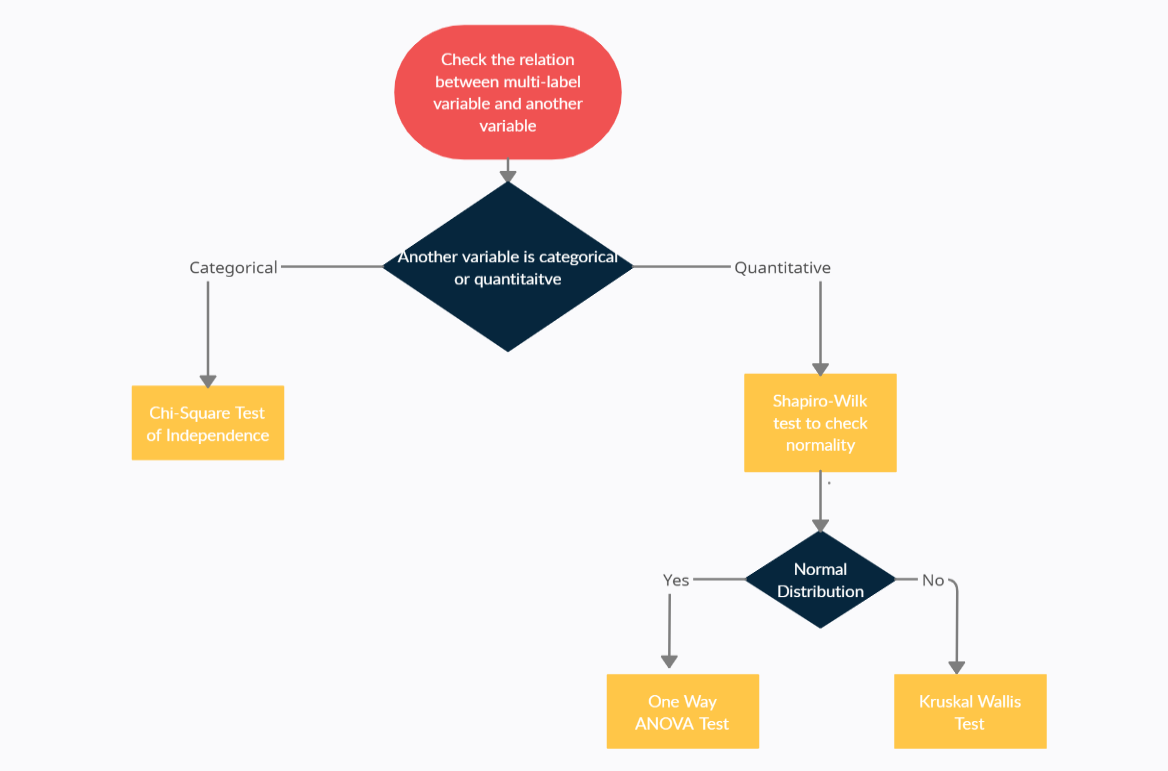